In [1]:
#Following MultiVelo tutorial

In [ ]:
import os
import multivelo as mv
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

In [2]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [3]:
#read in the data
adata_result = sc.read_h5ad("multivelo_result.h5ad")

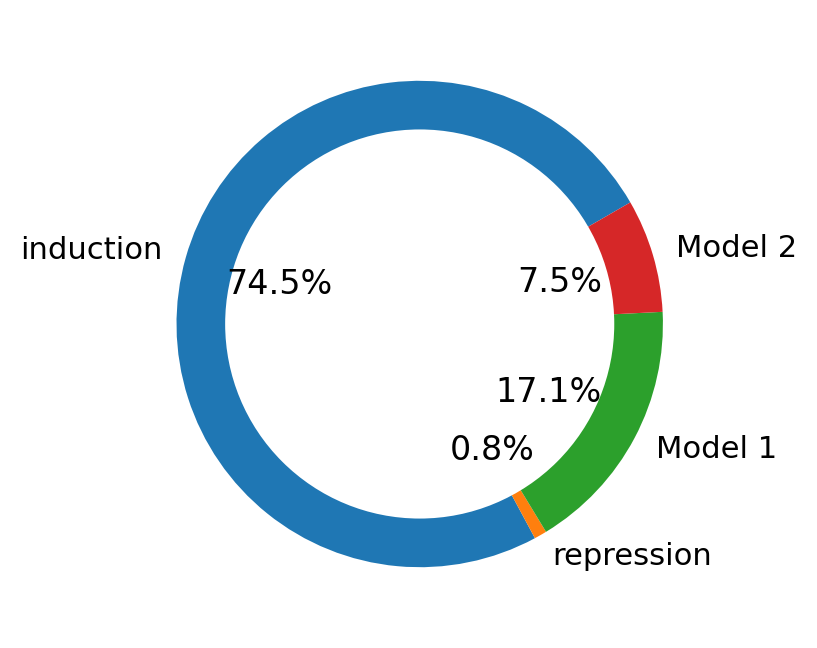

In [4]:
mv.pie_summary(adata_result)
plt.savefig("/gpfs/commons/home/eeton/M12/06_multivelo/figures/01_pie_summary.png")

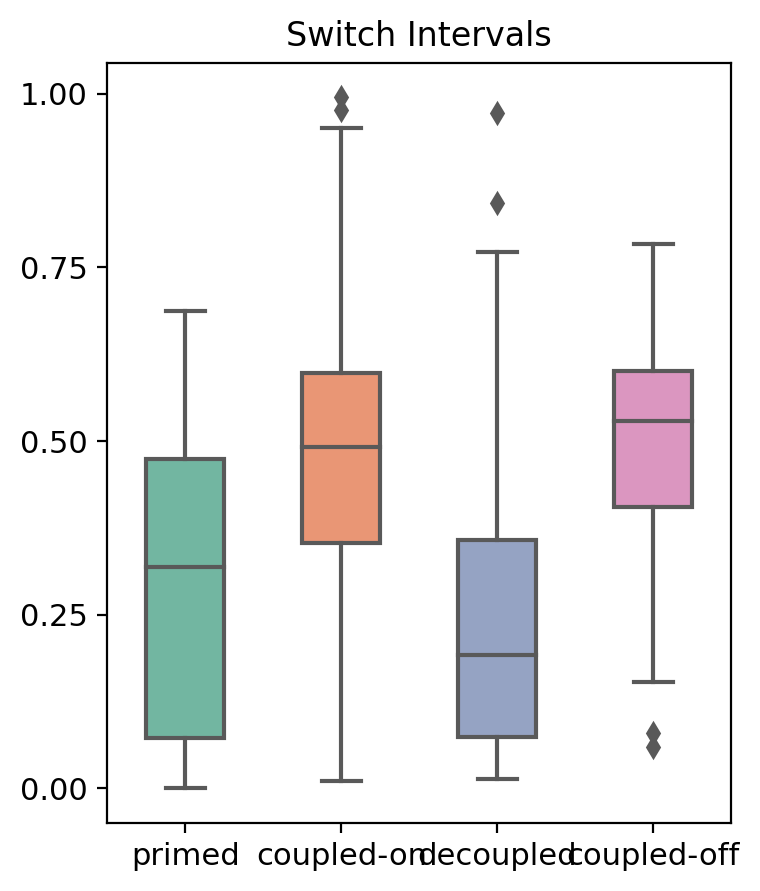

In [5]:
mv.switch_time_summary(adata_result)
plt.savefig("/gpfs/commons/home/eeton/M12/06_multivelo/figures/02_switch_time_summary.png")

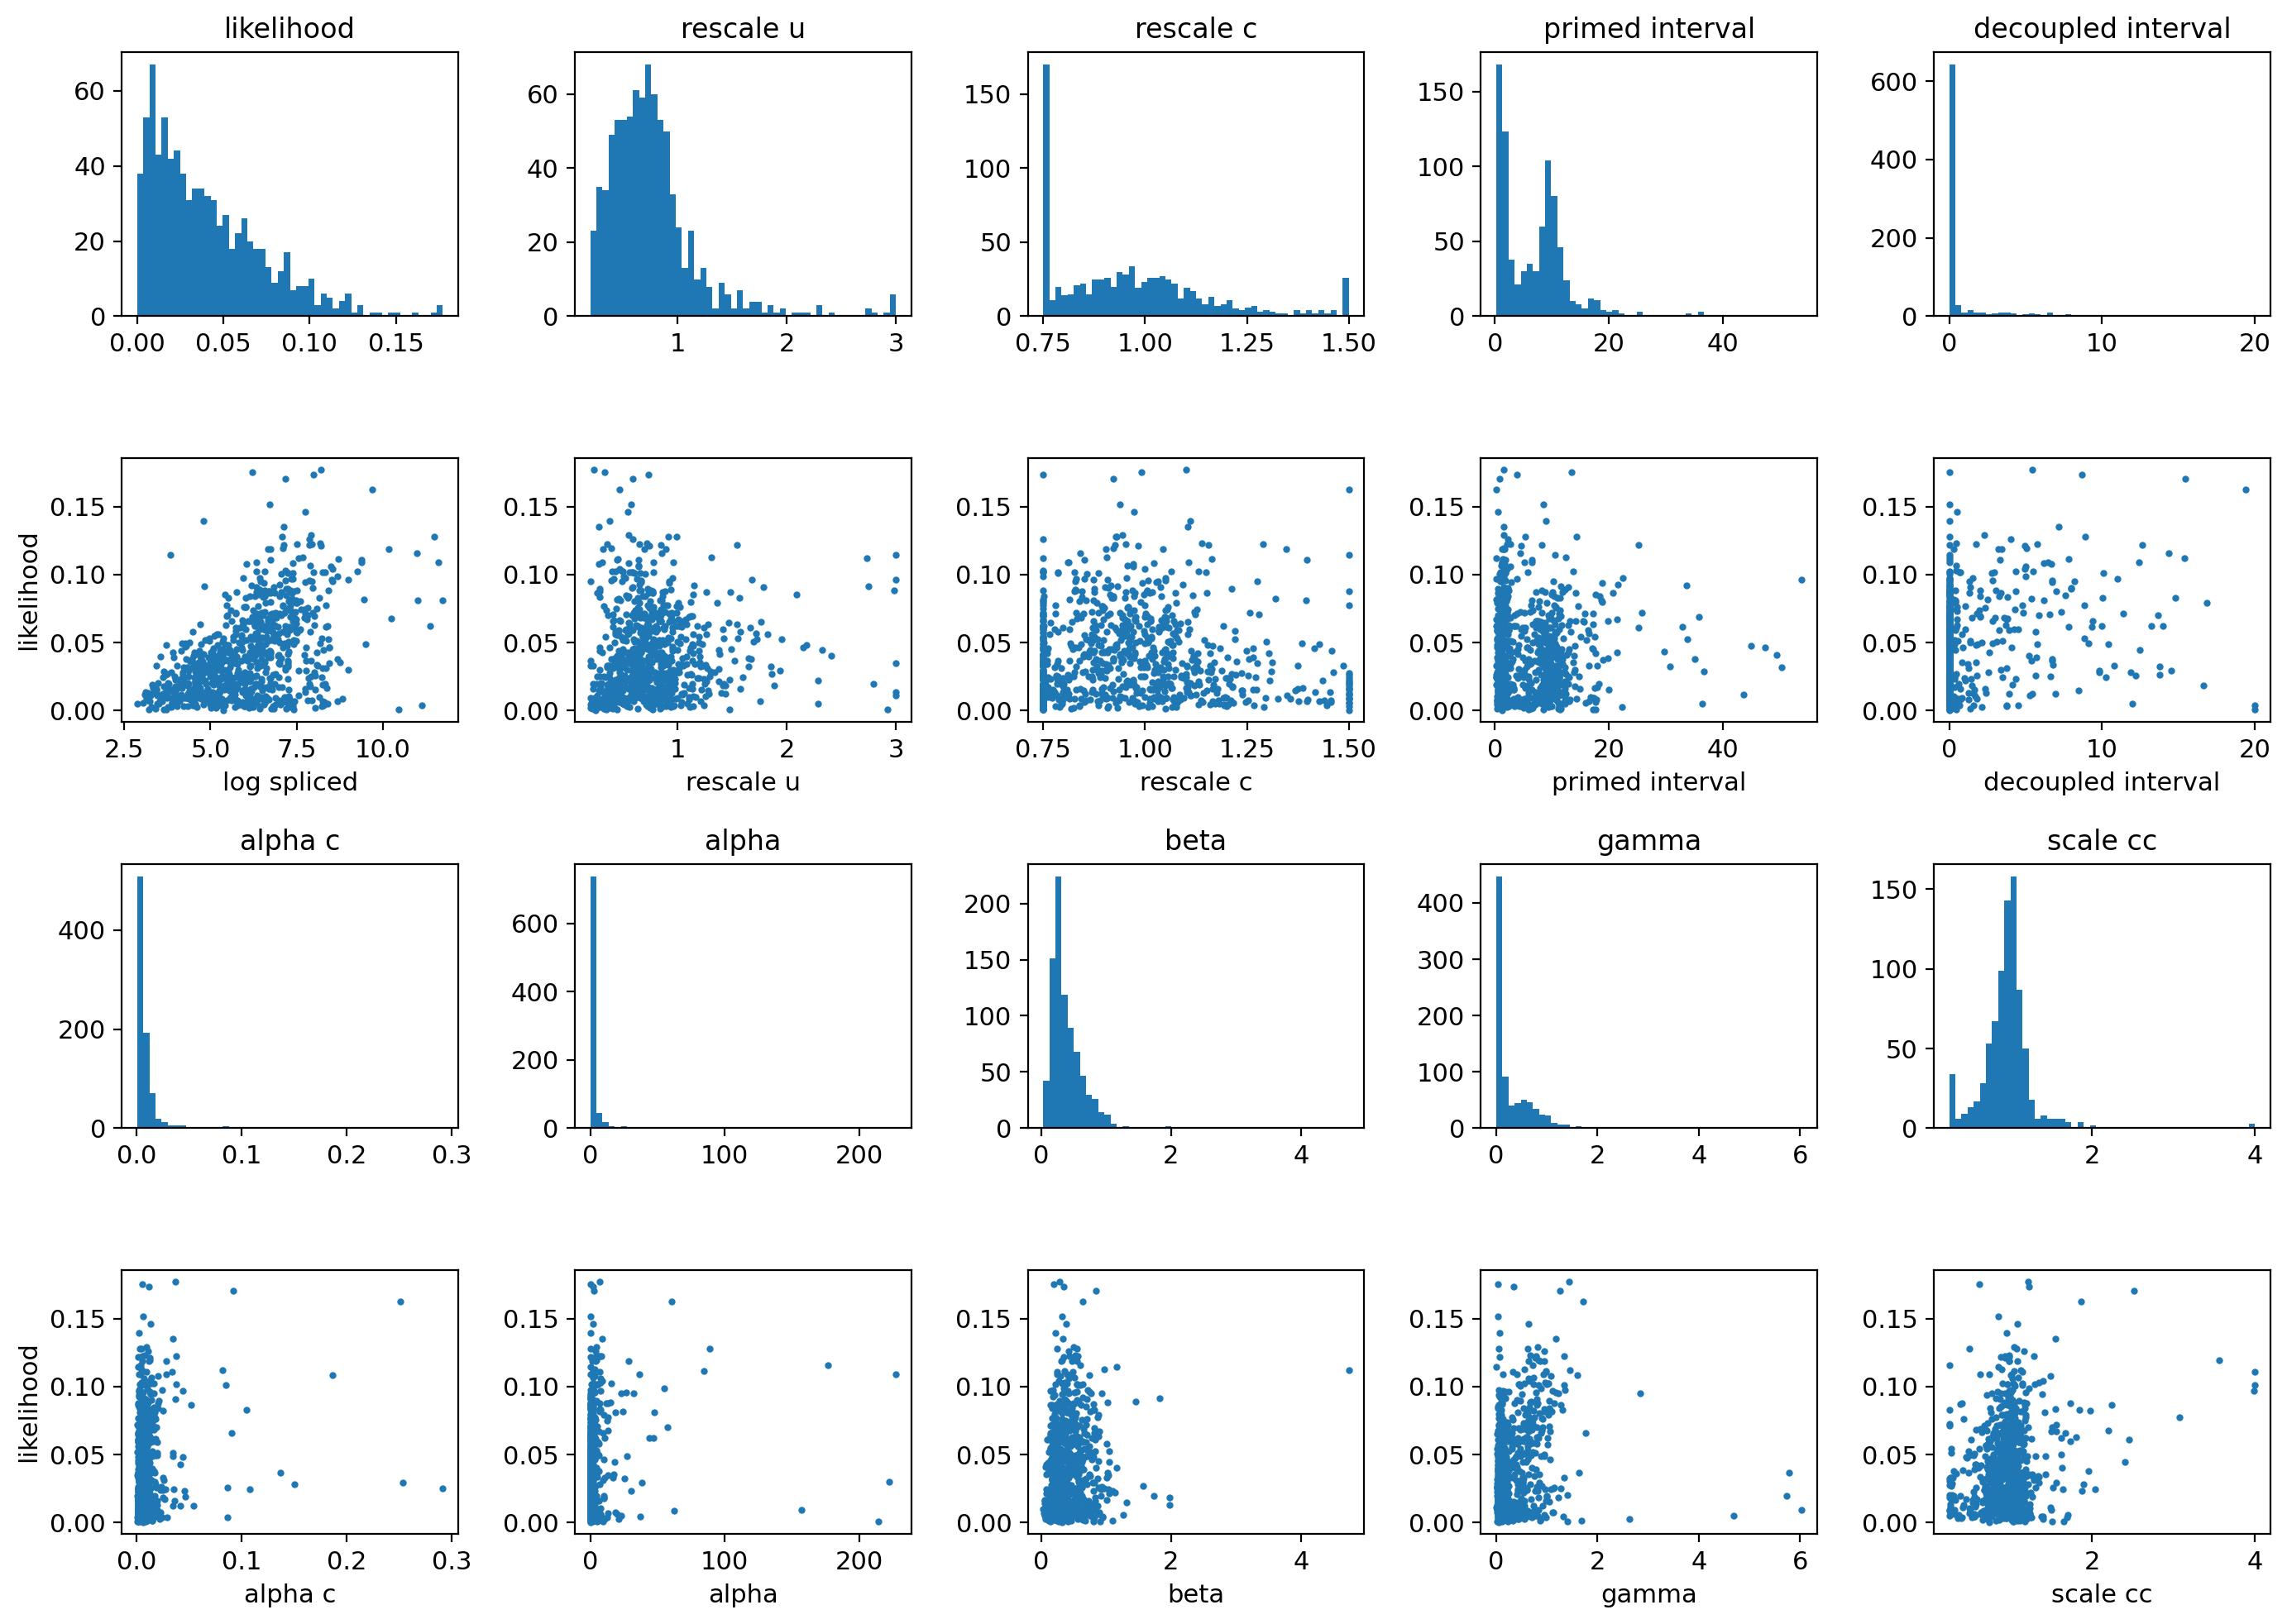

In [6]:
mv.likelihood_plot(adata_result)
plt.savefig("/gpfs/commons/home/eeton/M12/06_multivelo/figures/03_likelihood.png")

Computing velocity stream and latent time

In [7]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/40 cores)


  0%|          | 0/18178 [00:00<?, ?cells/s]

    finished (0:00:45) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:06) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:07) --> added 
    'latent_time', shared time (adata.obs)


In [8]:
adata_result

AnnData object with n_obs × n_vars = 18178 × 836
    obs: 'n_counts', 'celltype', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes'
    uns: 'celltype_colors', 'neighbors', 'pca', 'umap', 'velo_chrom_params', 'velo_s_params', 'velo_u_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_neg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'fit_anchor_c', 'fit_anchor_c_sw', 'fit_anchor_c_velo', 'fit_

In [9]:
new_umap = pd.read_csv('umap.csv', sep=',', index_col=0)
numpy_new_umap=new_umap.to_numpy()
len(numpy_new_umap)

18178

In [10]:
adata_result.obsm['seurat_umap'] = numpy_new_umap

In [11]:
#Realized that I had used the wrong annotations (non - dictionary mapped), so reload a new table containing
#dictionary mapped annotations
cell_annot = pd.read_csv('02_ee_dict_pred.tsv', sep='\t', index_col=0)
adata_result = adata_result[cell_annot.index,:]
adata_result.obs['celltype'] = cell_annot['predicted.celltype.l2']
adata_result.obs['celltype'] = cell_annot.loc[adata_result.obs_names, 'predicted.celltype.l2']
adata_result.obs['celltype'] = adata_result.obs['celltype'].astype('category')

Trying to set attribute `.obs` of view, copying.


In [12]:
adata_result

AnnData object with n_obs × n_vars = 18178 × 836
    obs: 'n_counts', 'celltype', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes'
    uns: 'celltype_colors', 'neighbors', 'pca', 'umap', 'velo_chrom_params', 'velo_s_params', 'velo_u_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_neg'
    obsm: 'X_pca', 'X_umap', 'seurat_umap'
    varm: 'PCs', 'fit_anchor_c', 'fit_anchor_c_sw', 'fit_anchor

Renamed 'seurat_umap' to convention 'X_seurat_umap' (adata.obsm).
computing velocity embedding
    finished (0:00:10) --> added
    'velo_s_norm_seurat_umap', embedded velocity vectors (adata.obsm)
saving figure to file /gpfs/commons/home/eeton/M12/06_multivelo/figures/04_velocity_project_umap.png


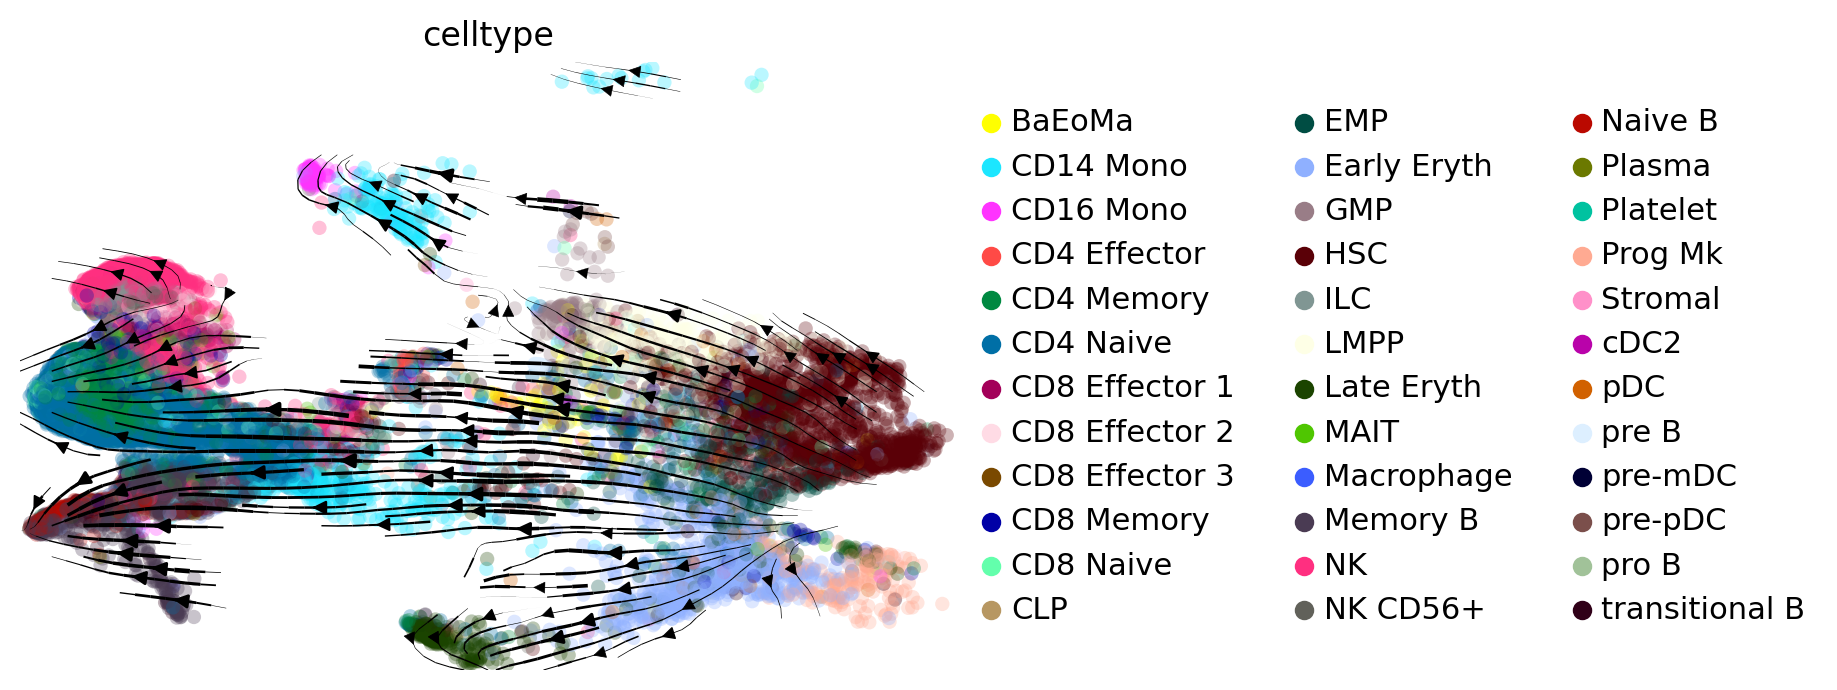

In [13]:
mv.velocity_embedding_stream(adata_result, 
                             basis='seurat_umap', 
                             color='celltype',
                             legend_loc = 'right_margin',
                             save="/gpfs/commons/home/eeton/M12/06_multivelo/figures/04_velocity_project_umap.png")



saving figure to file /gpfs/commons/home/eeton/M12/06_multivelo/figures/05_latent_time.png


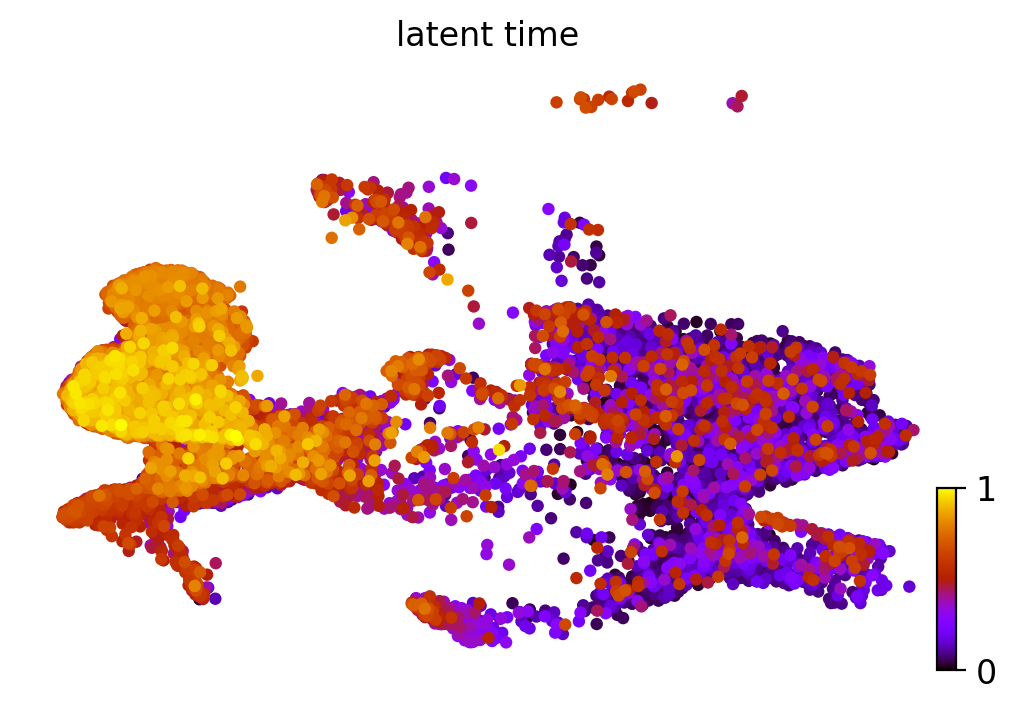

In [14]:
scv.pl.scatter(adata_result, 
               basis = 'seurat_umap',
               color='latent_time', 
               color_map='gnuplot', 
               size=80,
               save="/gpfs/commons/home/eeton/M12/06_multivelo/figures/05_latent_time.png")

In [15]:
adata_result

AnnData object with n_obs × n_vars = 18178 × 836
    obs: 'n_counts', 'celltype', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes'
    uns: 'celltype_colors', 'neighbors', 'pca', 'umap', 'velo_chrom_params', 'velo_s_params', 'velo_u_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_neg'
    obsm: 'X_pca', 'X_umap', 'seurat_umap', 'X_seurat_umap', 'velo_s_norm_seurat_umap'
    varm: 'PCs', 'f